# Cenus Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and 
Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: 
((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over 
$50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian 
non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come
back to all the controls we used. The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic
characteristics should have similar weights. There is one important caveat to remember about this statement. That is
that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the
statement only applies within state.


In [22]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
#importing the dataset
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
#Checking the Dataset shape 
df.shape

(32560, 15)

In [25]:
#checking the columns name
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [26]:
#checking more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
#checking the statistical summary of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
#Checking the counts of capital_loss column which has more number of zero's
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [29]:
#Checking the counts of Capital_gain columns which has more number of zero's
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [30]:
#Checking the counts of Race columns which is unwanted
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [31]:
#Dropping the columns which has more number of zero's and unwanted columns 
df.drop(columns = ['Race','Sex','Capital_gain','Capital_loss'],axis=1,inplace=True)

In [32]:
#checking the counts of label Income column 
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [33]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,20,United-States,<=50K


In [34]:
#Checking for the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [35]:
# Using LabelEncoder for transforming string columns into Numerical one's
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
# transforming the string/objects values into numerical data using LabelEncoder
df1 =le.fit_transform(df['Workclass'])
pd.Series(df1)
df['Workclass'] = df1
df2 = le.fit_transform(df['Education'])
pd.Series(df2)
df['Education'] = df2
df3 = le.fit_transform(df['Marital_status'])
pd.Series(df3)
df['Marital_status'] = df3
df4 = le.fit_transform(df['Occupation'])
pd.Series(df4)
df['Occupation'] = df4
df5 = le.fit_transform(df['Relationship'])
pd.Series(df5)
df['Relationship'] = df5
df6 = le.fit_transform(df['Native_country'])
pd.Series(df6)
df['Native_country'] = df6
df7 = le.fit_transform(df['Income'])
pd.Series(df7)
df['Income'] = df7

In [37]:
#Now checking that string columns/data are converted to numerical one's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Hours_per_week  32560 non-null  int64
 9   Native_country  32560 non-null  int32
 10  Income          32560 non-null  int32
dtypes: int32(7), int64(4)
memory usage: 1.9 MB


In [38]:
#replacing all zero's values present in columns with the mean of their respective columns
df['Workclass'] = df['Workclass'].replace(0,df['Workclass'].mode()[0])
df['Education'] = df['Education'].replace(0,df['Education'].mode()[0])
df['Marital_status'] = df['Marital_status'].replace(0,df['Marital_status'].mode()[0])
df['Occupation'] = df['Occupation'].replace(0,df['Occupation'].mode()[0])
df['Relationship'] = df['Relationship'].replace(0,df['Relationship'].mean())
df['Native_country'] = df['Native_country'].replace(0,df['Native_country'].mode()[0])

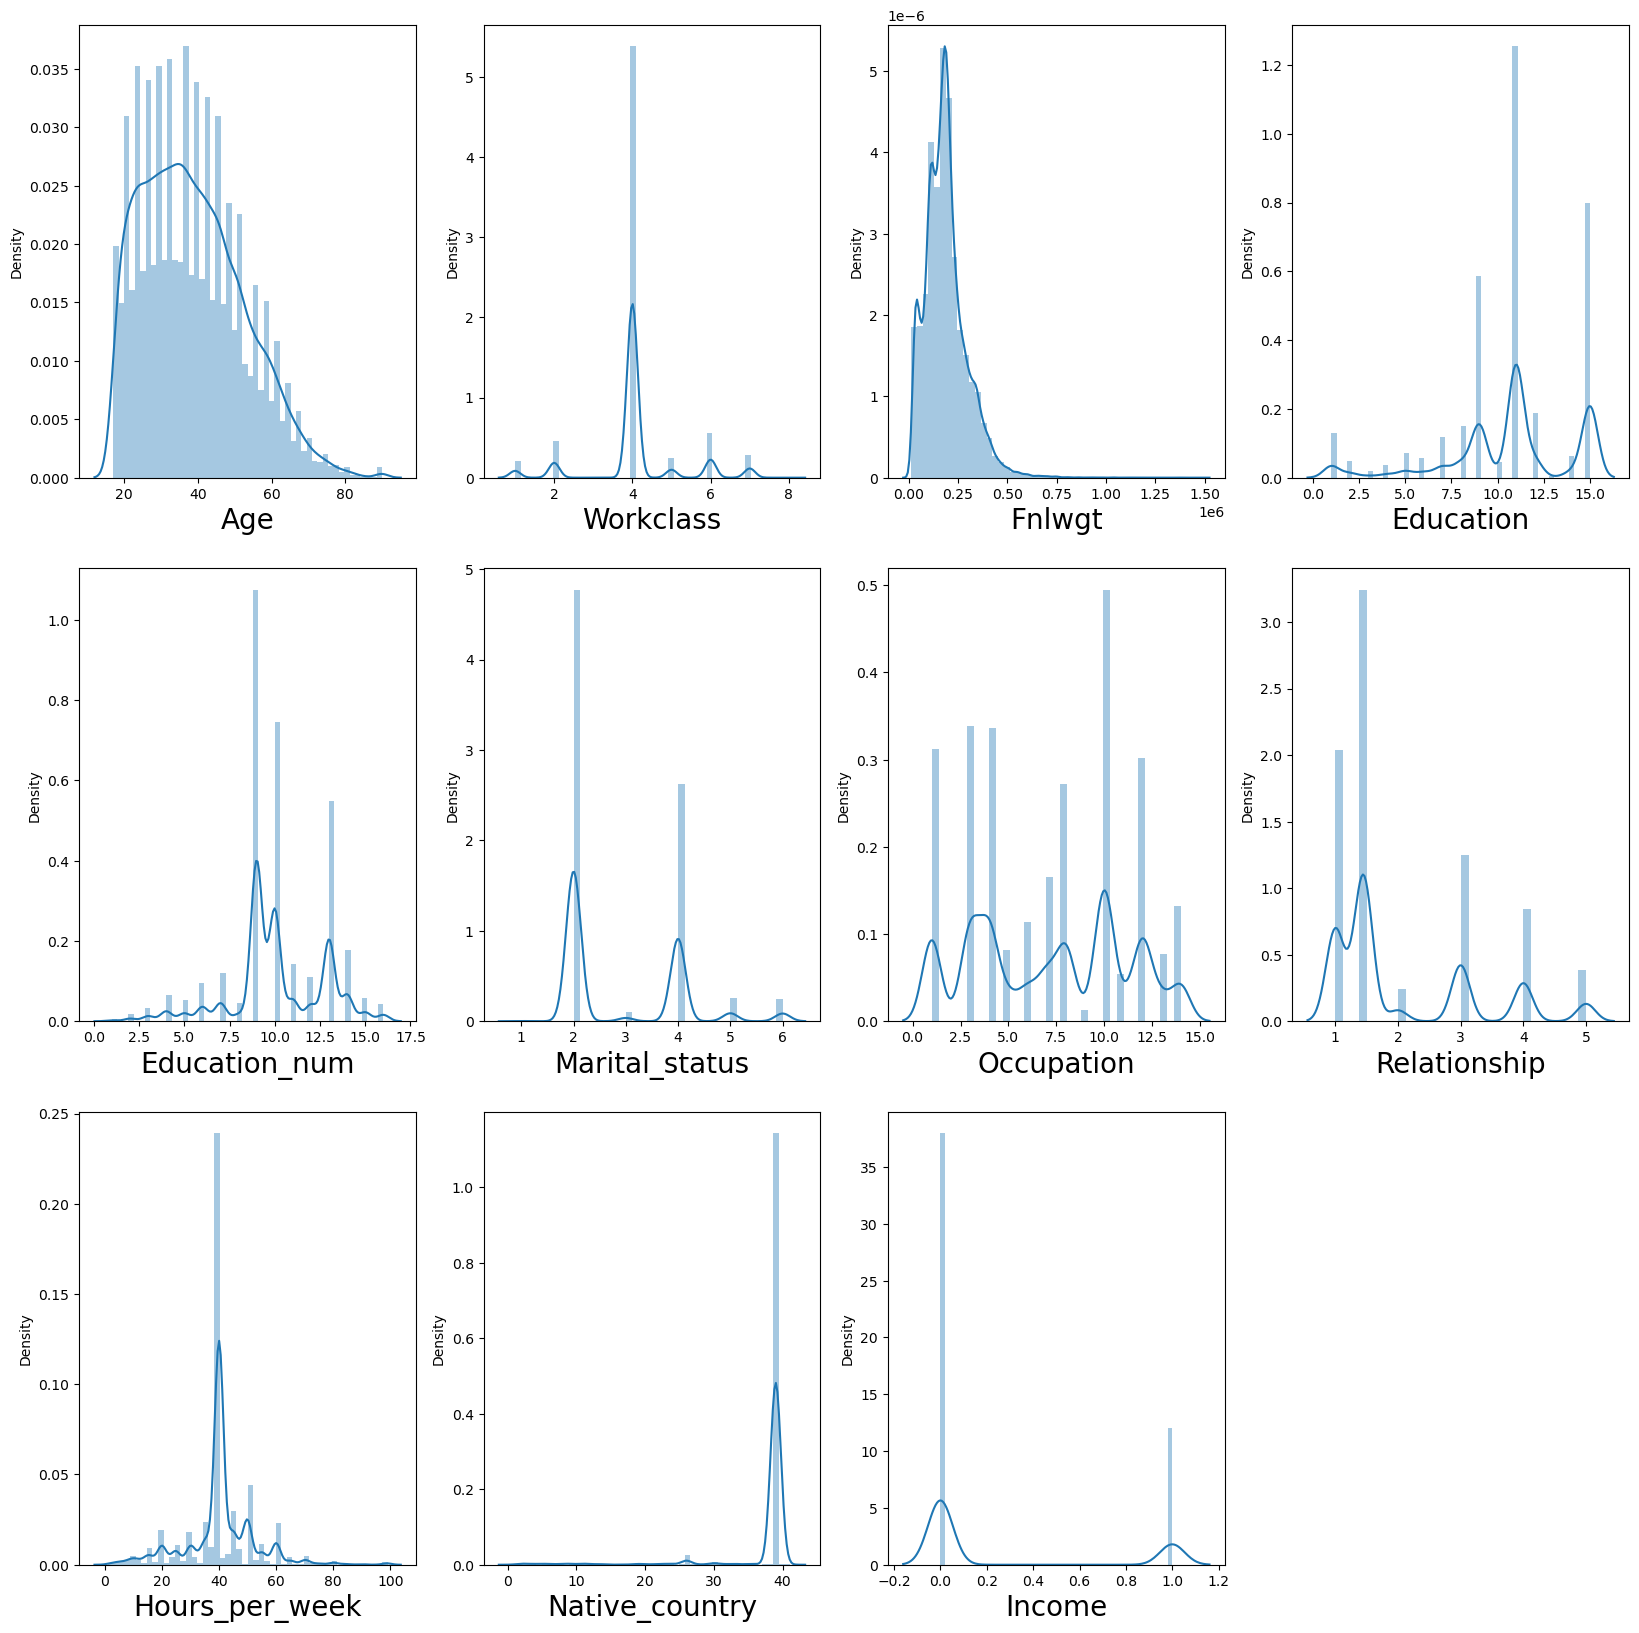

In [39]:
#plotting the distribution plot to checking the normal distribution 
plt.figure(figsize = (20,20))
pl = 1

for column in df:
    if pl<=11:
        ax = plt.subplot(3,4,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

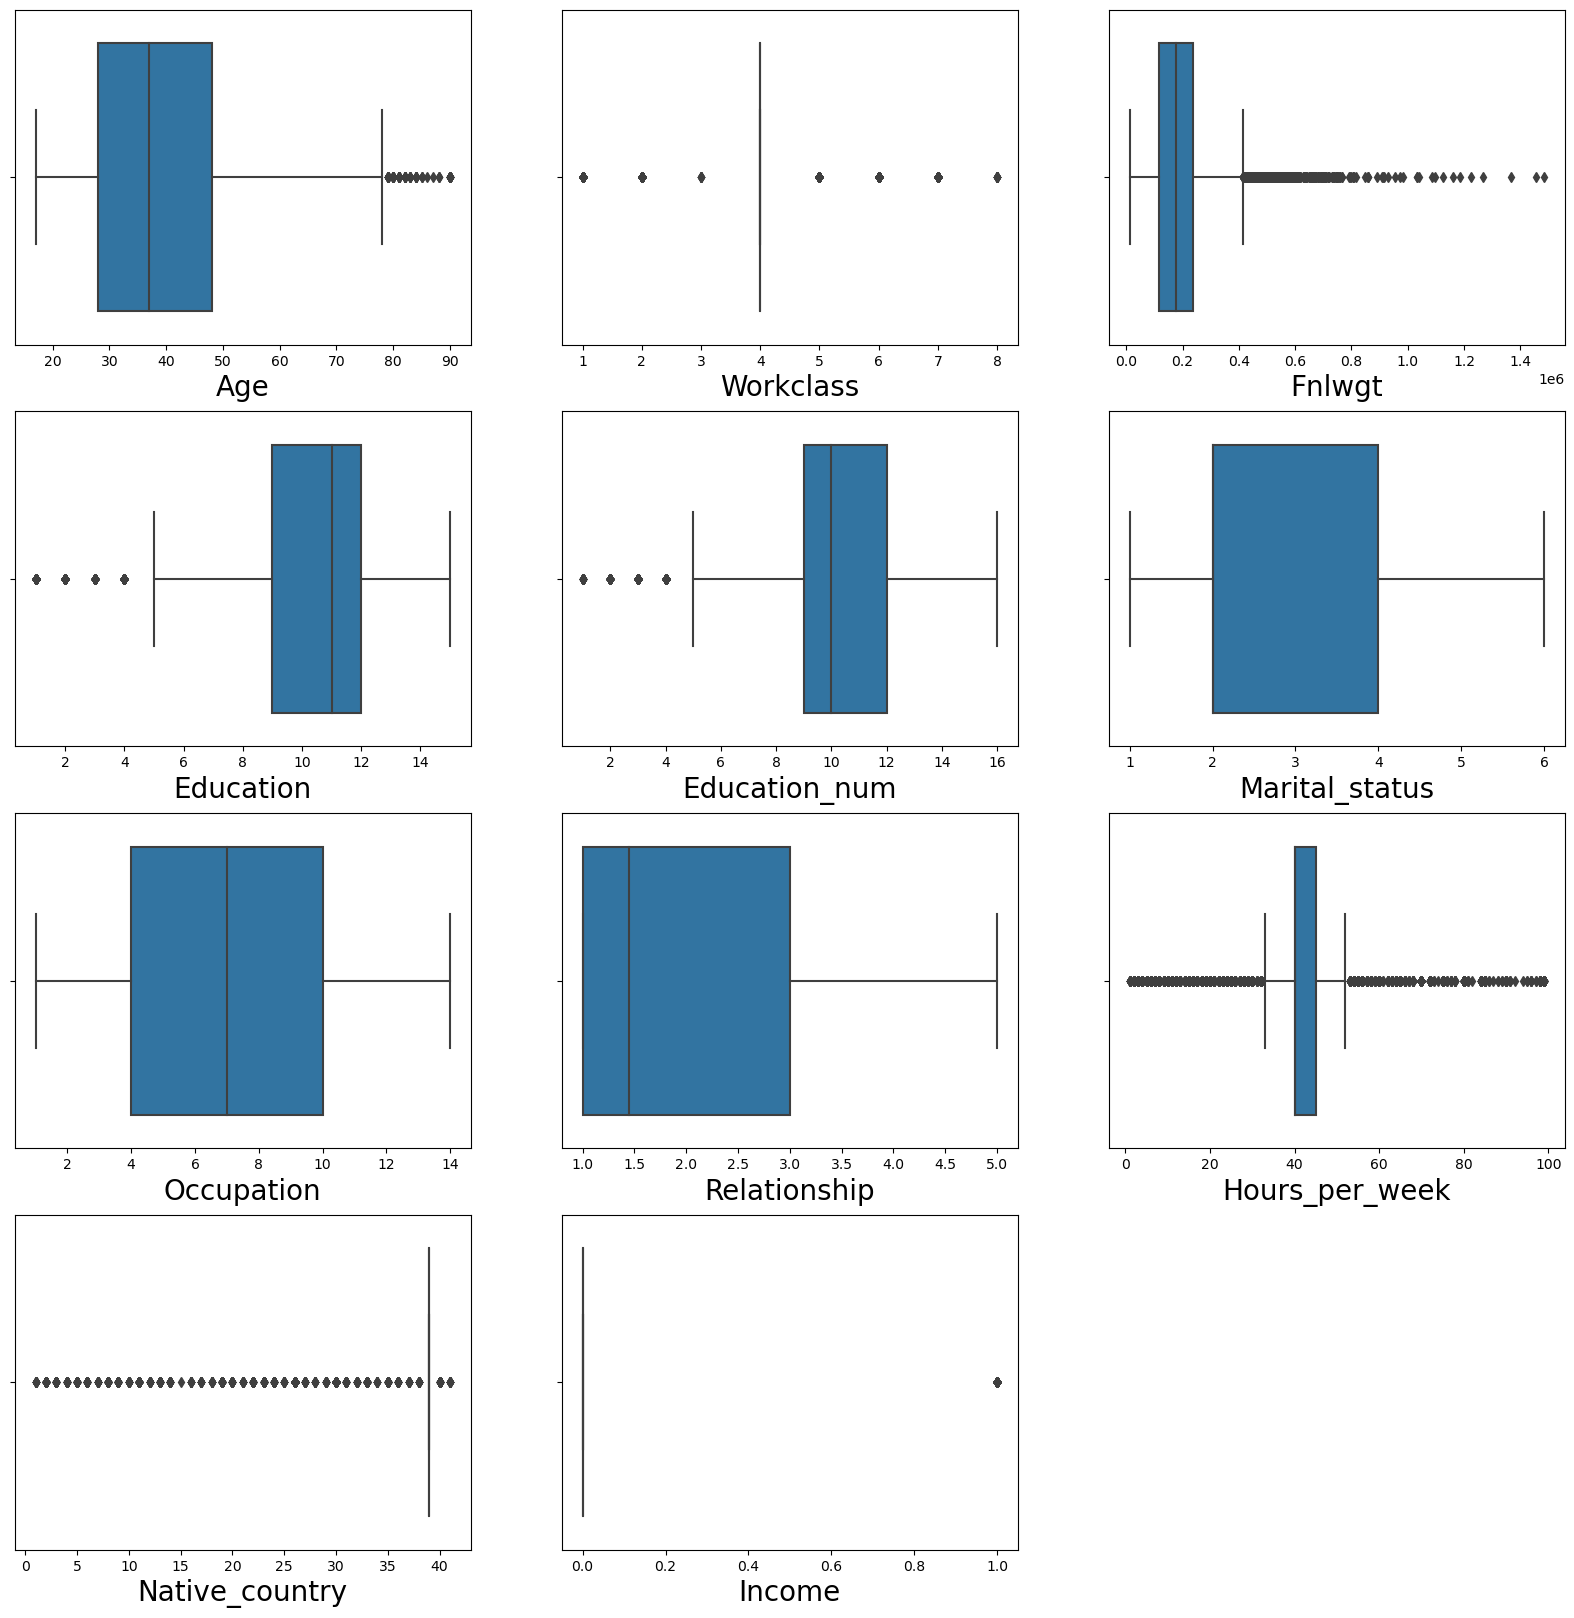

In [40]:
# plotting the boxplot to checking the outliers in the ddataset
plt.figure(figsize = (20,20))
pl = 1

for column in df:
    if pl<=11:
        ax = plt.subplot(4,3,pl)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [41]:
#Checking the outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [42]:
# Removing the outliers from Age column
age = (q3.Age + (1.5 * iqr.Age))
age

index = np.where(df['Age']>age)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,1.446376,13,39,0
1,1,38,4,215646,11,9,2,6,1.000000,40,39,0
2,2,53,4,234721,1,7,2,6,1.446376,40,39,0
3,3,28,4,338409,9,13,2,10,5.000000,40,5,0
4,4,37,4,284582,12,14,2,4,5.000000,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,4,257302,7,12,2,13,5.000000,38,39,0
32413,32556,40,4,154374,11,9,2,7,1.446376,40,39,1
32414,32557,58,4,151910,11,9,6,1,4.000000,40,39,0
32415,32558,22,4,201490,11,9,4,1,3.000000,20,39,0


In [43]:
# Removing the outliers from Workclass column for lower outliers
wc = (q1.Workclass - (1.5 * iqr.Workclass))
wc

index = np.where(df['Workclass']>wc)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,2,6,1.000000,40,39,0
1,2,53,4,234721,1,7,2,6,1.446376,40,39,0
2,3,28,4,338409,9,13,2,10,5.000000,40,5,0
3,4,37,4,284582,12,14,2,4,5.000000,40,39,0
4,5,49,4,160187,6,5,3,8,1.000000,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27479,32554,22,4,310152,15,10,4,11,1.000000,40,39,0
27480,32555,27,4,257302,7,12,2,13,5.000000,38,39,0
27481,32556,40,4,154374,11,9,2,7,1.446376,40,39,1
27482,32557,58,4,151910,11,9,6,1,4.000000,40,39,0


In [45]:
# removing the outliers from Fnlwgt column
fn = (q3.Fnlwgt + (1.5 * iqr.Fnlwgt))
fn

index = np.where(df['Fnlwgt']>fn)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,2,6,1.000000,40,39,0
1,2,53,4,234721,1,7,2,6,1.446376,40,39,0
2,3,28,4,338409,9,13,2,10,5.000000,40,5,0
3,4,37,4,284582,12,14,2,4,5.000000,40,39,0
4,5,49,4,160187,6,5,3,8,1.000000,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26604,32554,22,4,310152,15,10,4,11,1.000000,40,39,0
26605,32555,27,4,257302,7,12,2,13,5.000000,38,39,0
26606,32556,40,4,154374,11,9,2,7,1.446376,40,39,1
26607,32557,58,4,151910,11,9,6,1,4.000000,40,39,0


In [46]:
# Removing the lower outliers from Education column
edu = (q1.Education - (1.5 * iqr.Education))
edu

index = np.where(df['Education']>edu)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,2,53,4,234721,1,7,2,6,1.446376,40,39,0
1,17,38,4,28887,1,7,2,12,1.446376,50,39,0
2,22,43,4,117037,1,7,2,14,1.446376,40,39,0
3,34,48,4,242406,1,7,4,7,4.000000,40,33,0
4,55,46,4,216666,4,3,2,7,1.446376,40,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1843,32476,49,4,114648,2,8,2,10,2.000000,40,39,0
1844,32492,24,4,381895,1,7,2,7,4.000000,40,39,0
1845,32499,34,4,60567,1,7,2,14,4.000000,60,39,0
1846,32521,58,4,147707,1,7,2,12,1.446376,40,39,0


In [47]:
#Removing the lower outliers fom the Education_num column
edu_n = (q1.Education_num - (1.5 * iqr.Education_num))
edu_n

index = np.where(df['Education_num']>edu_n)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,55,46,4,216666,4,3,2,7,1.446376,40,26,0
1,159,68,4,38317,3,2,2,10,1.000000,20,39,0
2,194,23,4,197387,4,3,2,14,2.000000,40,26,0
3,220,64,4,187656,3,2,2,10,1.000000,40,39,0
4,316,22,4,399087,4,3,2,7,2.000000,40,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
416,32213,22,2,164775,4,3,4,6,2.000000,40,13,1
417,32333,24,4,176580,4,3,3,5,1.000000,40,26,0
418,32402,48,4,325372,3,2,2,7,1.446376,40,32,0
419,32412,45,4,199590,4,3,2,7,1.446376,40,39,0


In [48]:
# Removing lower outliers from the Hours_per_week column
hr = (q1.Hours_per_week - (1.5 * iqr.Hours_per_week))
hr

index = np.where(df['Hours_per_week']>hr)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,159,68,4,38317,3,2,2,10,1.000000,20,39,0
1,510,53,4,251804,4,3,6,10,4.000000,30,39,0
2,535,57,4,190942,3,2,6,9,1.000000,30,39,0
3,770,37,4,327323,4,3,5,5,1.000000,32,13,0
4,873,55,4,282753,4,3,2,8,4.000000,25,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,30411,41,4,213416,4,3,2,10,1.446376,32,26,0
64,30482,20,4,200089,4,3,4,6,4.000000,30,13,0
65,30557,61,4,229744,3,2,2,10,1.446376,20,26,0
66,31549,47,4,88564,4,3,4,7,3.000000,20,39,0


In [49]:
#Removing the high outliers from the Hours_per_week column
hrs = (q3.Hours_per_week + (1.5 * iqr.Hours_per_week))
hrs

index = np.where(df['Hours_per_week']>hrs)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,159,68,4,38317,3,2,2,10,1.000000,20,39,0
1,510,53,4,251804,4,3,6,10,4.000000,30,39,0
2,535,57,4,190942,3,2,6,9,1.000000,30,39,0
3,770,37,4,327323,4,3,5,5,1.000000,32,13,0
4,873,55,4,282753,4,3,2,8,4.000000,25,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,30411,41,4,213416,4,3,2,10,1.446376,32,26,0
64,30482,20,4,200089,4,3,4,6,4.000000,30,13,0
65,30557,61,4,229744,3,2,2,10,1.446376,20,26,0
66,31549,47,4,88564,4,3,4,7,3.000000,20,39,0


In [50]:
# Removing the lower outliers from Native_country columns
N_c = (q1.Native_country - (1.5 * iqr.Native_country))
N_c

index = np.where(df['Native_country']>N_c)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,159,68,4,38317,3,2,2,10,1.000000,20,39,0
1,510,53,4,251804,4,3,6,10,4.000000,30,39,0
2,535,57,4,190942,3,2,6,9,1.000000,30,39,0
3,770,37,4,327323,4,3,5,5,1.000000,32,13,0
4,873,55,4,282753,4,3,2,8,4.000000,25,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,30411,41,4,213416,4,3,2,10,1.446376,32,26,0
62,30482,20,4,200089,4,3,4,6,4.000000,30,13,0
63,30557,61,4,229744,3,2,2,10,1.446376,20,26,0
64,31549,47,4,88564,4,3,4,7,3.000000,20,39,0


In [51]:
# Removing the high outliers from the Native_country column
nc = (q3.Native_country + (1.5 * iqr.Native_country))
nc

index = np.where(df['Native_country']>nc)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country,Income
0,159,68,4,38317,3,2,2,10,1.000000,20,39,0
1,510,53,4,251804,4,3,6,10,4.000000,30,39,0
2,535,57,4,190942,3,2,6,9,1.000000,30,39,0
3,770,37,4,327323,4,3,5,5,1.000000,32,13,0
4,873,55,4,282753,4,3,2,8,4.000000,25,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,30411,41,4,213416,4,3,2,10,1.446376,32,26,0
62,30482,20,4,200089,4,3,4,6,4.000000,30,13,0
63,30557,61,4,229744,3,2,2,10,1.446376,20,26,0
64,31549,47,4,88564,4,3,4,7,3.000000,20,39,0


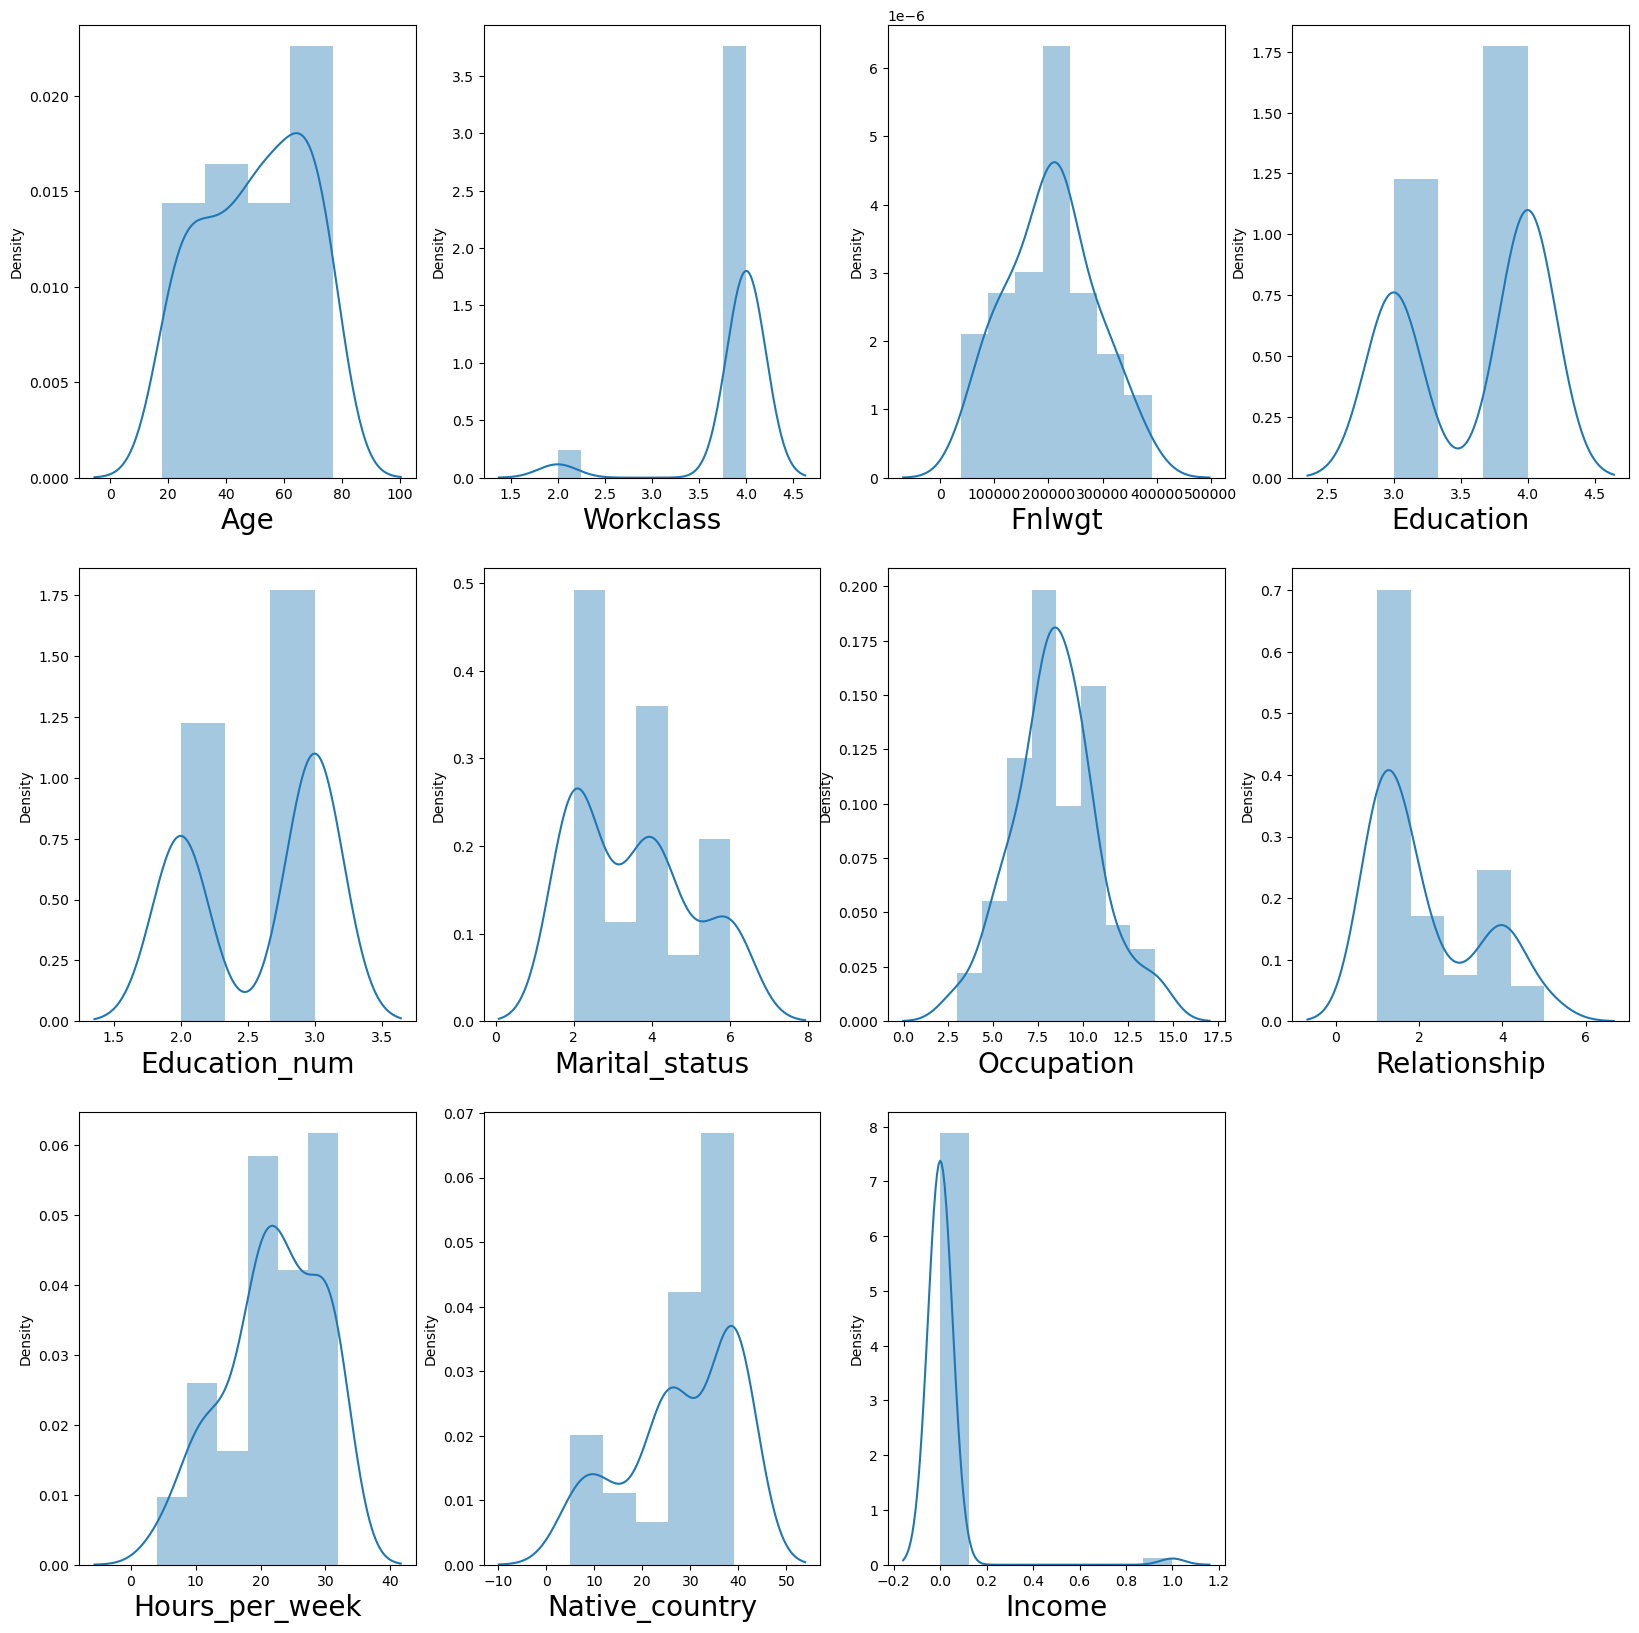

In [52]:
#Conforming the removing the outliers
plt.figure(figsize = (20,20))
pl = 1

for column in df:
    if pl<=11:
        ax = plt.subplot(3,4,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [53]:
#Splitting the dataset into features and Labels
x = df.drop(columns = ['Income'])
y = df['Income']

In [54]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Hours_per_week,Native_country
159,68,4,38317,3,2,2,10,1.000000,20,39
510,53,4,251804,4,3,6,10,4.000000,30,39
535,57,4,190942,3,2,6,9,1.000000,30,39
770,37,4,327323,4,3,5,5,1.000000,32,13
873,55,4,282753,4,3,2,8,4.000000,25,39
...,...,...,...,...,...,...,...,...,...,...
30411,41,4,213416,4,3,2,10,1.446376,32,26
30482,20,4,200089,4,3,4,6,4.000000,30,13
30557,61,4,229744,3,2,2,10,1.446376,20,26
31549,47,4,88564,4,3,4,7,3.000000,20,39


In [55]:
y

159      0
510      0
535      0
770      0
873      0
        ..
30411    0
30482    0
30557    0
31549    0
32152    0
Name: Income, Length: 66, dtype: int32

In [56]:
#Checking the labels counts 
y.value_counts()
# its looks there is only one data which has greater than 50K

0    65
1     1
Name: Income, dtype: int64

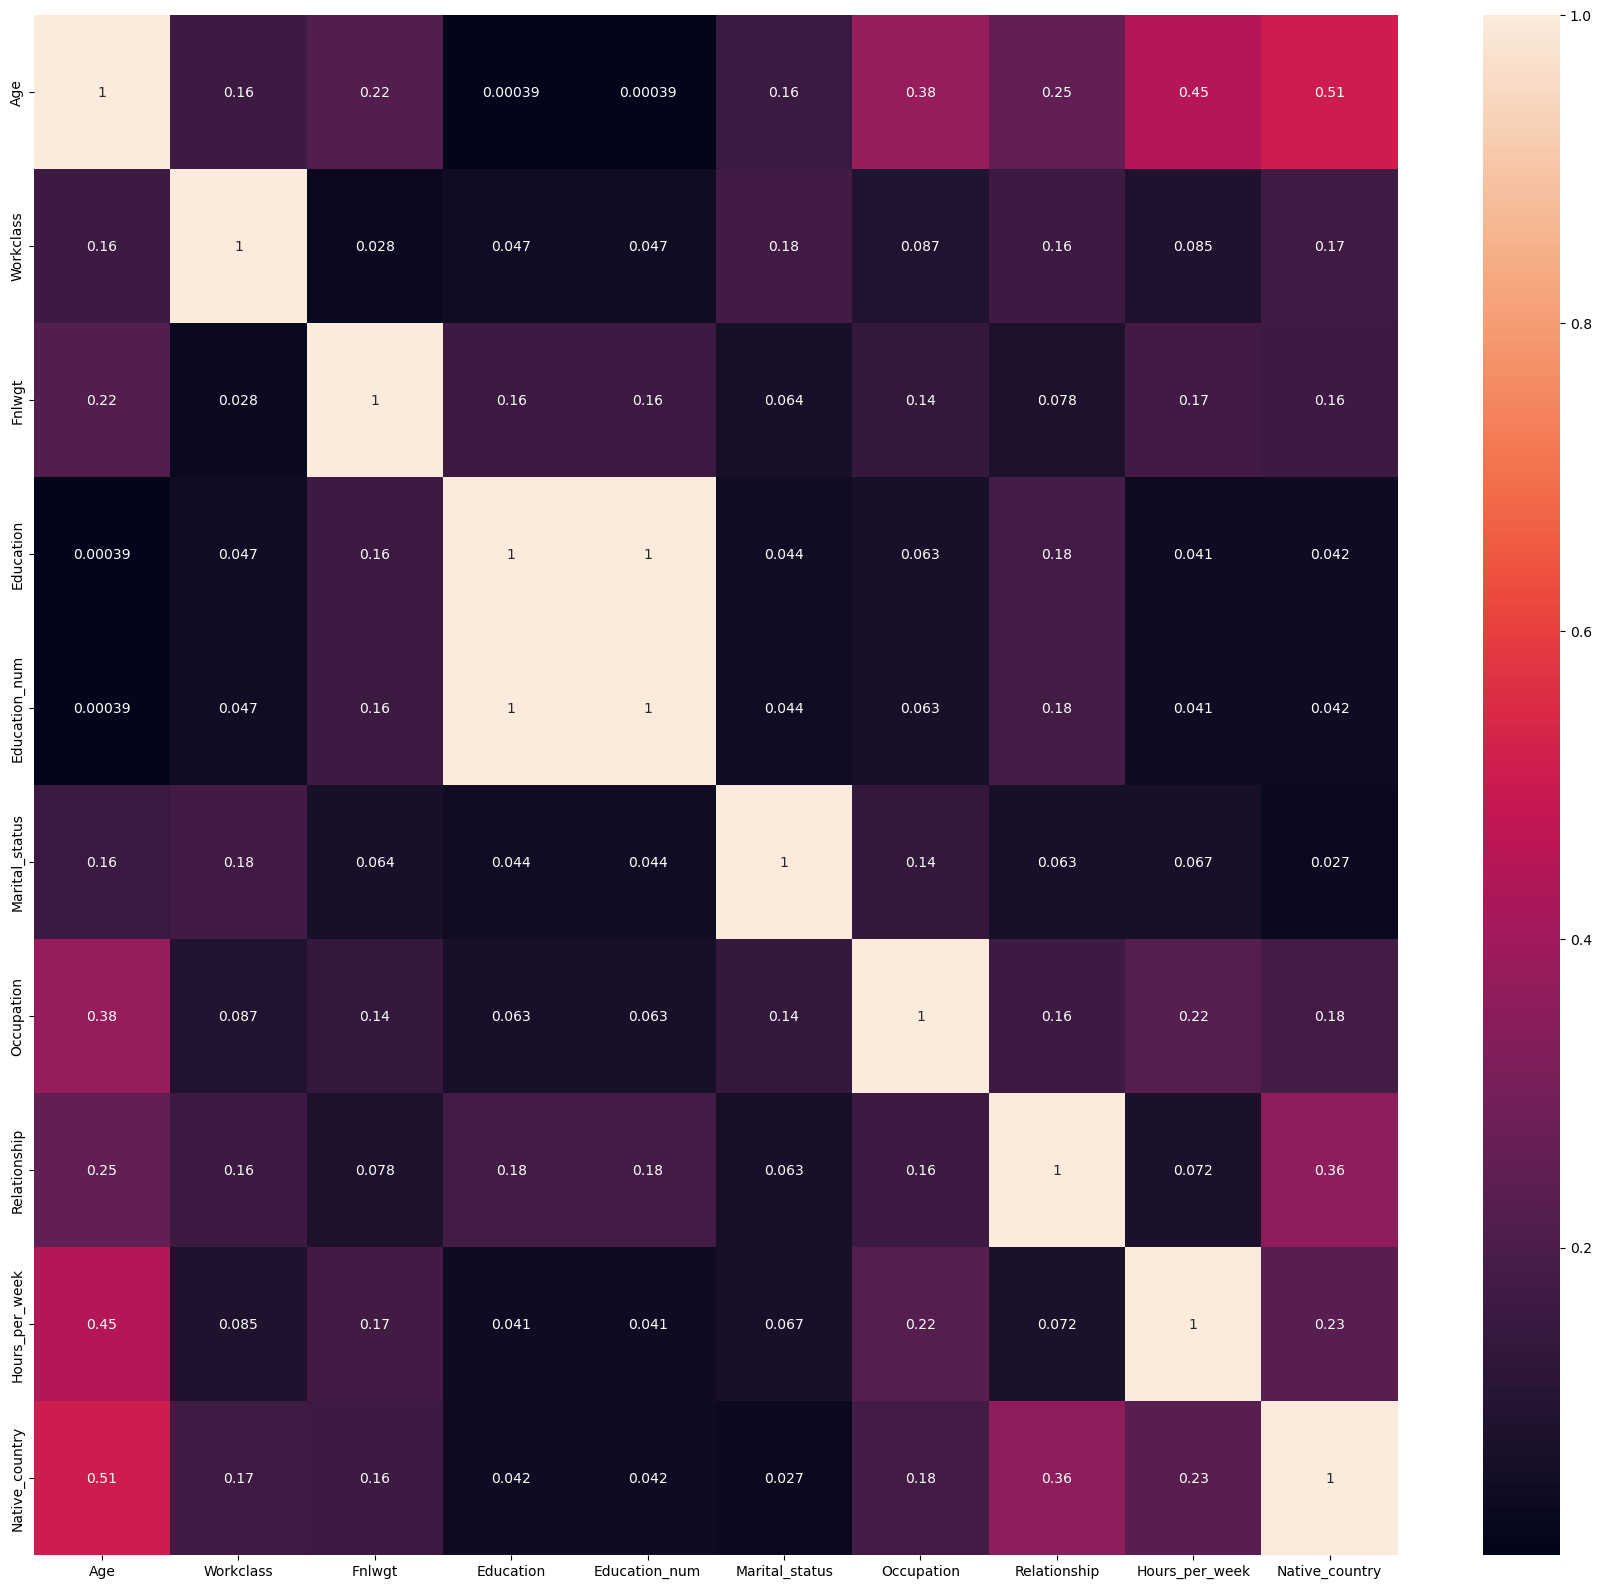

In [57]:
#Checking the co_relation between each columns 
x_corr = x.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':10})
plt.show()

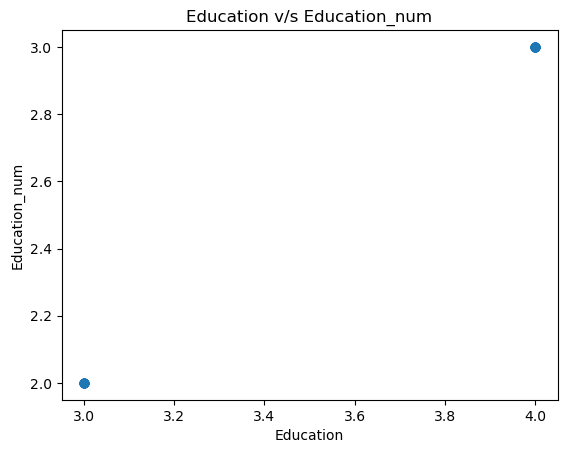

In [58]:
## plotting scatter plot to confirm co_relation between Education and Education_num
plt.scatter(x.Education,x.Education_num)
plt.xlabel('Education')
plt.ylabel('Education_num')
plt.title('Education v/s Education_num')
plt.show()

In [59]:
#Dropping thecolumns which has high co_variance
x = x.drop(columns = ['Education_num'])

In [60]:
# transforming the feature into StandardScaler form
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [61]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 45)

# Decision Tree Classifier

In [62]:
#Using DecisionTree Classifier 
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
#DecisionTree score for trainig data
dtc.score(x_train,y_train)

1.0

In [64]:
#Predicting the value wih x_test data
preddtc = dtc.predict(x_test)
preddtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [66]:
#Accuracy model score 
accuracy_score(y_test,preddtc)


0.9411764705882353

In [67]:
confusion_matrix(preddtc,y_test)

array([[16,  1],
       [ 0,  0]], dtype=int64)

In [69]:
print(classification_report(preddtc,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.00      0.00      0.00         0

    accuracy                           0.94        17
   macro avg       0.50      0.47      0.48        17
weighted avg       1.00      0.94      0.97        17



In [71]:
#Cross validation score 
cross_val_score(dtc,x_sc,y,cv = 5)

array([0.92857143, 0.92307692, 0.92307692, 0.92307692, 1.        ])

In [72]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.9549450549450549

In [73]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [76]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [78]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [82]:
#Applying the best parameters into DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 2,min_samples_leaf = 1,min_samples_split = 2)

In [83]:
#Applying the best parameters into training data
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [84]:
#predicting the values with new Parameters
pred_dtc = dt.predict(x_test)
pred_dtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
#Accuracy score with best_feature using GridSearchCV
accuracy_score(y_test,pred_dtc)

0.9411764705882353

In [86]:
# Predicting with another algorithmn KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [87]:
#KNeighborsClassifier Score
knn.score(x_train,y_train)

1.0

In [88]:
#Predicting with KNeighorsClassifier
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
accuracy_score(predknn,y_test)

0.9411764705882353

In [90]:
confusion_matrix(predknn,y_test)

array([[16,  1],
       [ 0,  0]], dtype=int64)

In [91]:
print(classification_report(predknn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.00      0.00      0.00         0

    accuracy                           0.94        17
   macro avg       0.50      0.47      0.48        17
weighted avg       1.00      0.94      0.97        17



In [92]:
## the problem statement is to predict the person can earn Greater than 50K$ or not
## Classification Problem
## In this problem statement used two Algorithm
#1) KNighborsClassifier got 94% Accuracy score
#2) DecisionTreeClassifier got 94% Accuracy score

# Note: After removing the outliers from the features the result it predicting only less than 50K$, there is issue in the dataset